In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Exploring different toy datasets

## 1 - Linearly Separable Dataset
This is a **linearly separable** dataset created using scikit-learn's `make_classification` function. This dataset consists of two classes. We'll visualize the data distribution.



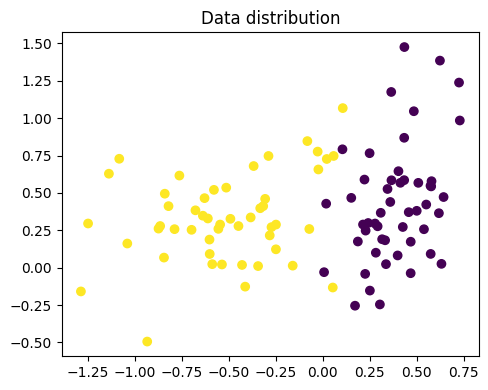

In [2]:
from sklearn.datasets import make_classification

# Create a subplot for the plot
fig, ax = plt.subplots(figsize=(5, 4))

# Generate a linearly separable dataset with specific characteristics
linearly_separable = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1,
    class_sep=0.4 # separation between the classes >1.0 well separated <1.0 not fully separated.
)

# Extract the features (X) and labels (y) from the generated dataset
X, y = linearly_separable

# Scatter plot the data points for each class
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = 'viridis')

# Set the title for the plot
ax.set_title('Data distribution')

# Adjust the layout and display the plot
fig.tight_layout()
fig.show()


## 2 - Moon-Shaped Data
In this code, we generate a synthetic dataset with **moon-shaped** clusters using the `make_moons` function from scikit-learn. The dataset consists of two classes, and we assign class labels (0 or 1) to each data point. The code visualizes the distribution of data points for each class.

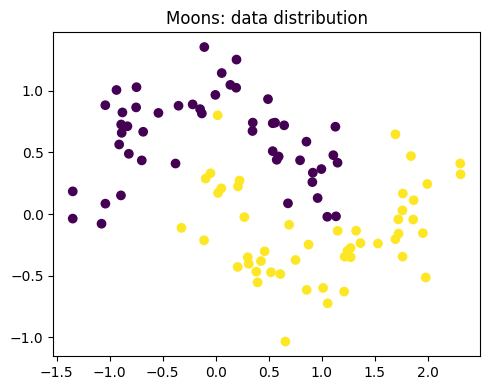

In [3]:
from sklearn.datasets import make_moons

# Create a subplot for the plot
fig, ax = plt.subplots(figsize=(5, 4))

# Generate a moon-shaped dataset with specific characteristics
moon_data = make_moons(n_samples=100, noise=0.2, random_state=1)

# Extract the features (X) and labels (y) from the generated dataset
X, y = moon_data

# Scatter plot the data points for each class
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = 'viridis')

# Set the title for the plot
ax.set_title('Moons: data distribution')

# Adjust the layout and display the plot
fig.tight_layout()
fig.show()

## 3 - Circles-Shaped Data
This code snippet utilizes the `make_circles` function from scikit-learn to create a synthetic dataset with data points distributed in circular patterns. The dataset consists of two classes, and class labels (0 or 1) are assigned to each data point. The code visualizes the distribution of data points for both classes.


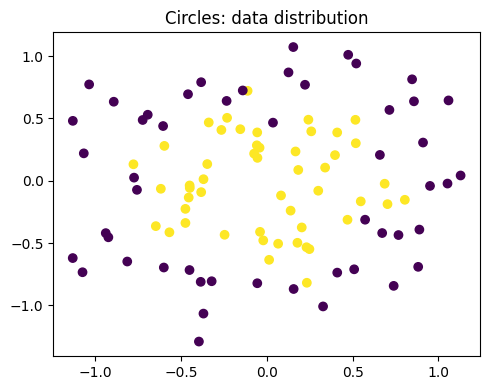

In [4]:
from sklearn.datasets import make_circles

fig, ax = plt.subplots(figsize=(5, 4))

circles_data = make_circles(n_samples=100, noise=0.2, random_state=1, factor=0.5)

X, y = circles_data
ax.scatter(X[:, 0], X[:, 1], c = y, cmap = 'viridis')
ax.set_title('Circles: data distribution')

fig.tight_layout()
fig.show()


# Decision boundaries

In [5]:
from sklearn.model_selection import train_test_split

# Generate a linearly separable dataset with specific characteristics
linearly_separable = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=90125, n_clusters_per_class=1,
    class_sep=1 # separation between the classes >1.0 well separated <1.0 not fully separated.
)

# Extract the features (X) and labels (y) from the generated dataset
X, y = linearly_separable

# Preprocess dataset: split into training and test part
X, y = linearly_separable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)

## Visualizing Decision Boundaries: An Alternative Approach model performance evaluation

We already explored various methods to measure the performance of machine learning models (accuracy, precision, confusion matrix, AUC). However, in today's session, we're taking an alternative approach: we'll visualize the decision boundaries created by these models.

Decision boundaries provide valuable insights into how models make predictions and can help us understand their behavior in a more intuitive way. By examining these boundaries, we gain a deeper understanding of how a model distinguishes between different classes or categories.

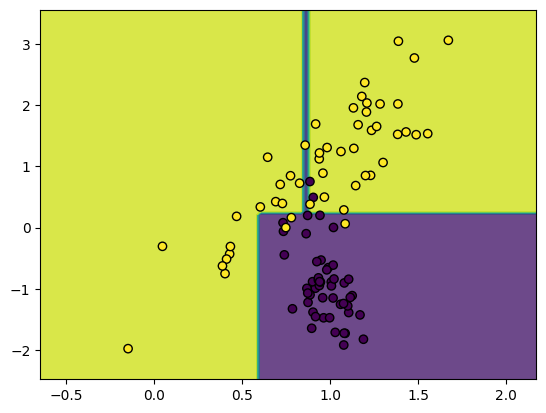

In [6]:
# Classifier and decision boundaries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Pipelines: apply functions to the dataset in the specified order

clf = make_pipeline(DecisionTreeClassifier(max_depth = 70)) #max_depth = 2, 5, 10, 70

# Just remember what we've seen during the last lecture: if I want to tune the hyperparameters the best option is the k-Fold Cross Validation!

clf.fit(X_train, y_train)

fig, ax = plt.subplots()
cm = plt.cm.viridis
cm_bright = plt.cm.viridis
DecisionBoundaryDisplay.from_estimator(
    clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
)

ax.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors="k")

In [7]:
# If the pipeline is employed we can have access to the accuracy, still
score = clf.score(X_test, y_test)
score

0.84

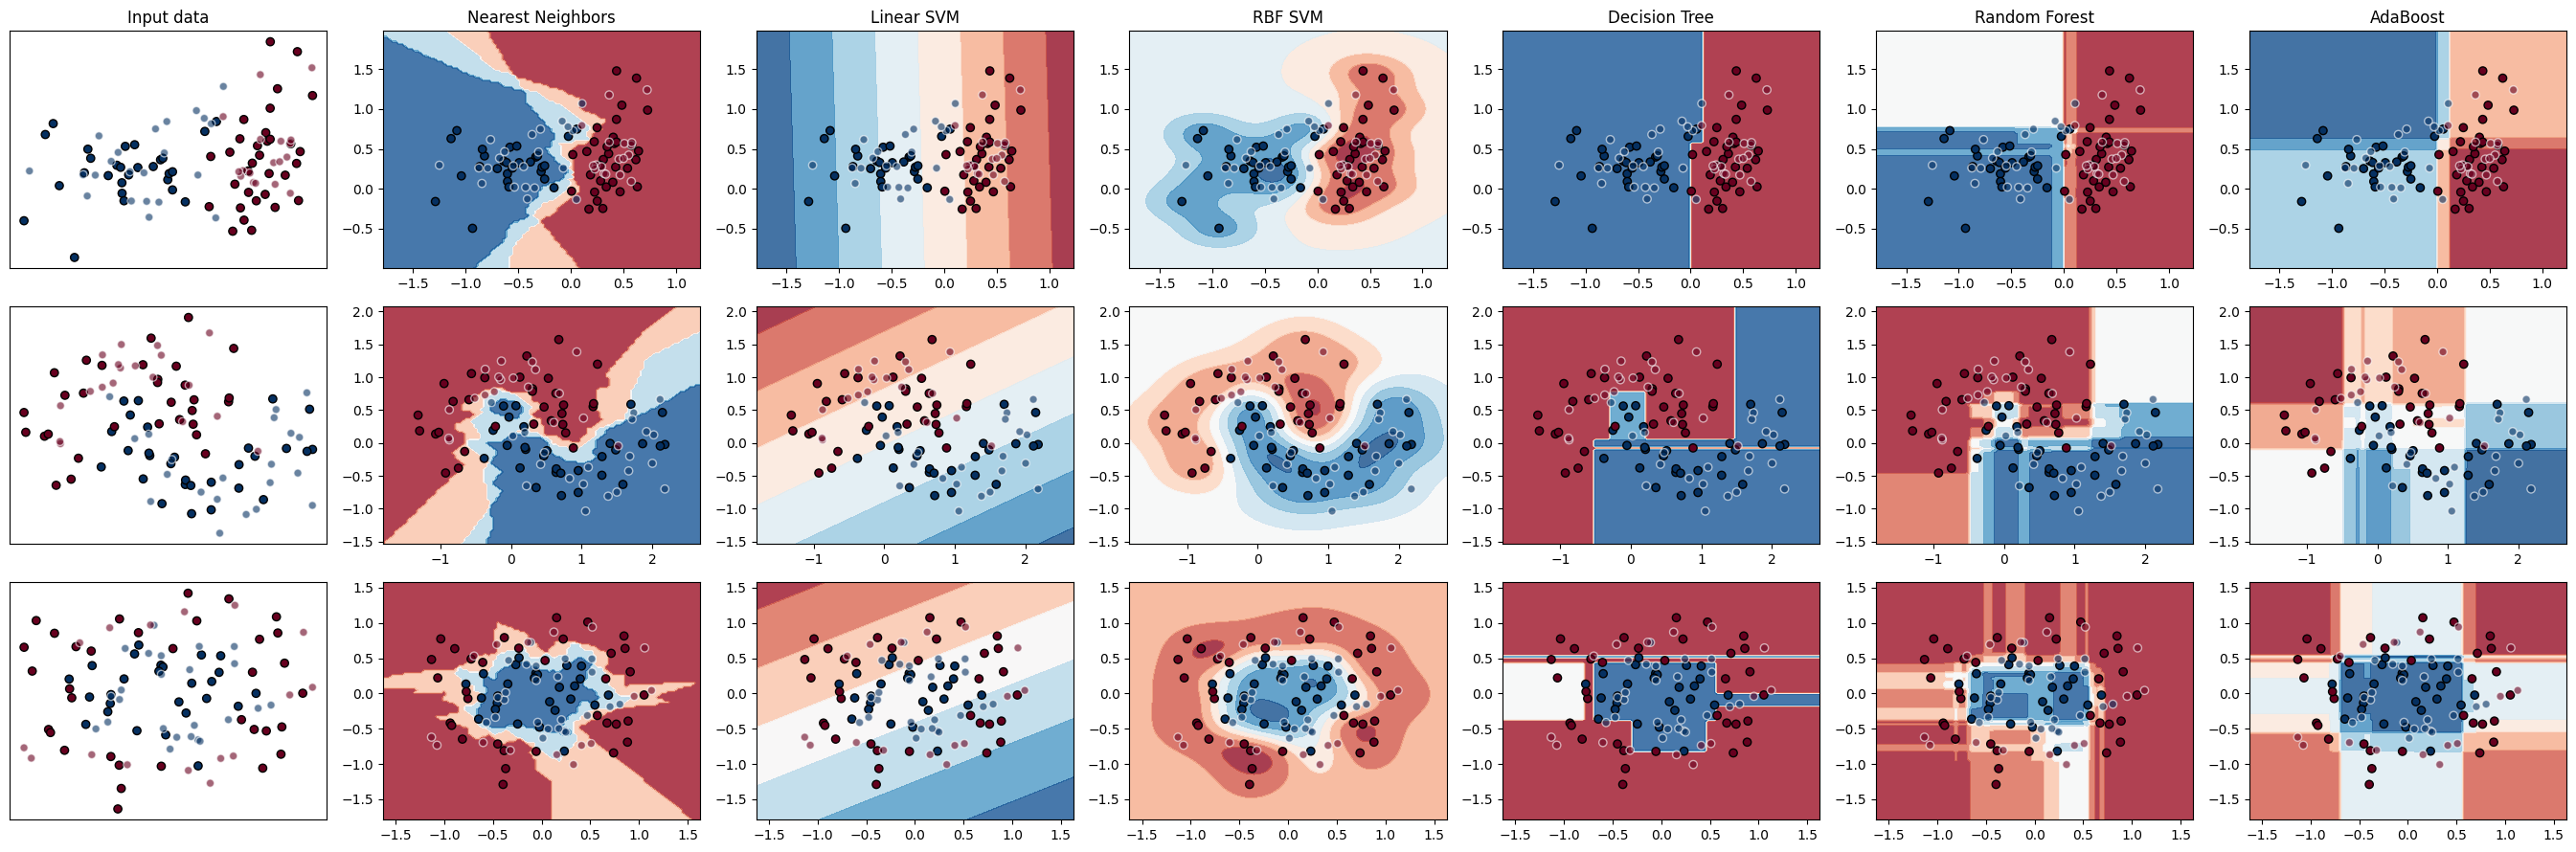

In [8]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    AdaBoostClassifier(random_state=42),
]

datasets = [
    make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, class_sep=0.4),
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
]

figure = plt.figure(figsize=(27, 9))

i = 1
# Iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # Preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # Plot the dataset first
    cm = plt.cm.RdBu
    # Create a subplot based on the number of datasets and classifiers
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors="black")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, alpha=0.6, edgecolors="white"
    )
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, classifier in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), classifier)
        clf.fit(X_train, y_train)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors="black"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=plt.cm.RdBu,
            edgecolors="white",
            alpha=0.6,
        )

        if ds_cnt == 0:
            ax.set_title(name)
        i += 1

plt.tight_layout()
plt.show()